## Data Analysis Results

project: Plain Japanese <br>
author:  Maya Udaka <br>
udaka@cl.uni-heidelberg.de <br>
filename: data_analysis_results.ipynb <br>
description: visualise results of data analysis <br>


Since data_analysis.py may not run properly due to a problem with the installation of sudachidict_core, the statistics of the analysed original/simplified data are displayed in this notebook.
See the section 4.2 Task 1: Analysis of the thesis data set for detailed explanations and analysis.

In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import seaborn as sns

### Original Sentences

In [2]:
original = pd.read_csv('analysed/original_analysed.csv', sep=',', header=[0]) # original
original

,Unnamed: 0,diff_words,loan_words,teineigo,doubleneg,passive,bunsetsu,moras,kanjis,len,kanji_prop,diff_words_prop,class
0,0,5,0,0,0,0,5,24,8,18,0.44,0.28,0
1,1,4,0,0,0,0,5,21,7,17,0.41,0.24,0
2,2,5,0,1,0,0,5,24,8,17,0.47,0.29,0
3,3,4,0,0,0,0,6,24,9,18,0.50,0.22,0
4,4,3,0,0,1,0,4,14,6,11,0.55,0.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,5,0,0,0,0,5,24,8,17,0.47,0.29,0
28637,28638,6,0,0,0,0,6,20,6,13,0.46,0.46,0
28638,28639,4,0,0,0,0,5,19,7,14,0.50,0.29,0
28639,28640,8,0,1,0,0,6,27,8,20,0.40,0.40,0


### Simplified Sentences

In [3]:
simplified = pd.read_csv('analysed/simplified_analysed.csv', sep=',', header=[0]) # simplified
simplified

,Unnamed: 0,diff_words,loan_words,teineigo,doubleneg,passive,bunsetsu,moras,kanjis,len,kanji_prop,diff_words_prop,class
0,0,3,0,1,0,0,6,24,8,18,0.44,0.17,1
1,1,4,0,0,0,0,5,23,8,17,0.47,0.24,1
2,2,2,0,1,0,0,3,14,5,10,0.50,0.20,1
3,3,4,0,1,0,0,4,15,4,13,0.31,0.31,1
4,4,4,0,0,0,0,4,18,5,16,0.31,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,49995,4,0,0,0,0,4,13,7,10,0.70,0.40,1
49992,49996,4,0,0,0,0,6,19,7,16,0.44,0.25,1
49993,49997,5,0,1,0,0,6,22,8,17,0.47,0.29,1
49994,49998,2,0,0,0,0,5,16,5,12,0.42,0.17,1


### Histograms and Bar plots

In [4]:
# in case the values are numerical

def create_histogram(df_org, df_plang, key, ylabel):
    
    plt.figure(figsize=(10,5))
    sns.set(font_scale=1)
    kwargs = dict(alpha=0.5, density=True, stacked=True)
    org = original[key]
    plang = simplified[key]

    plt.style.use('seaborn-deep')


    plt.hist([org, plang], bins=10, label=['original', 'simplified'], color=['c', 'm'], weights=[np.ones(len(org)) / len(org), np.ones(len(plang)) / len(plang)],orientation='horizontal')

    #plt.ylim(0.0, 0.6)
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
    plt.gca().set(xlabel='Percentage in the dataset', ylabel=ylabel)
    plt.legend(loc='upper right')
    plt.show()

In [5]:
# in case the values are boolean (true/false)

def prop_bar(key, columns):
    plt.figure(figsize=(10,5))
    sns.set(font_scale=1.0)
    org0 = original.groupby(key).count()["diff_words"][0]
    org1 = original.groupby(key).count()["diff_words"][1]
    result_o = [org0, org1] # org0 is false, org1 is true
    org = float(org1) / sum(result_o)

    sim0 = simplified.groupby(key).count()["diff_words"][0]
    sim1 = simplified.groupby(key).count()["diff_words"][1]
    result_p = [sim0, sim1]
    sim = float(sim1) / sum(result_p)

    my_python_list = [org,sim]
    index_labels = ["original", "simplified"]
    df_tei = pd.DataFrame(columns=columns,data=my_python_list, index=index_labels)


    df_tei.plot(kind='barh')
    plt.legend(loc="upper left", ncol=2)
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
    plt.gca().set(xlabel='Percentage in the dataset')
    plt.show()

#### Difficult Words

/tmp/ipykernel_2413793/258446453.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


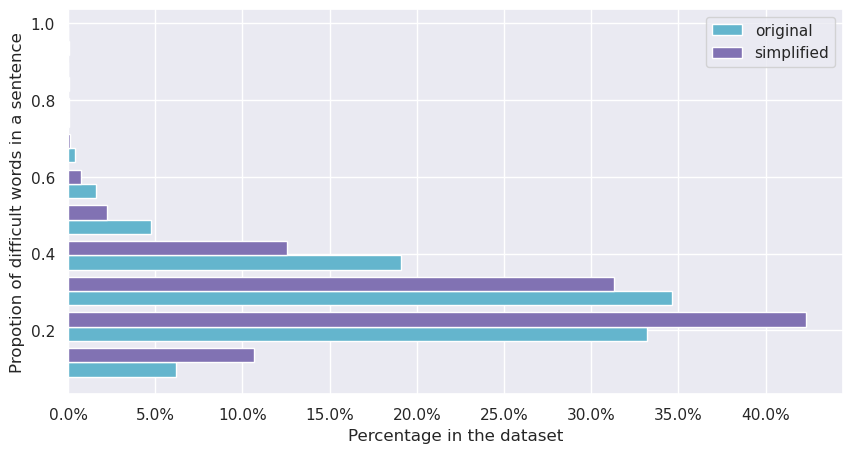

In [6]:
create_histogram(original, simplified, 'diff_words_prop', 'Propotion of difficult words in a sentence')

#### Bunsetsu (the smallest unit of a Japanese sentence)

/tmp/ipykernel_2413793/258446453.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


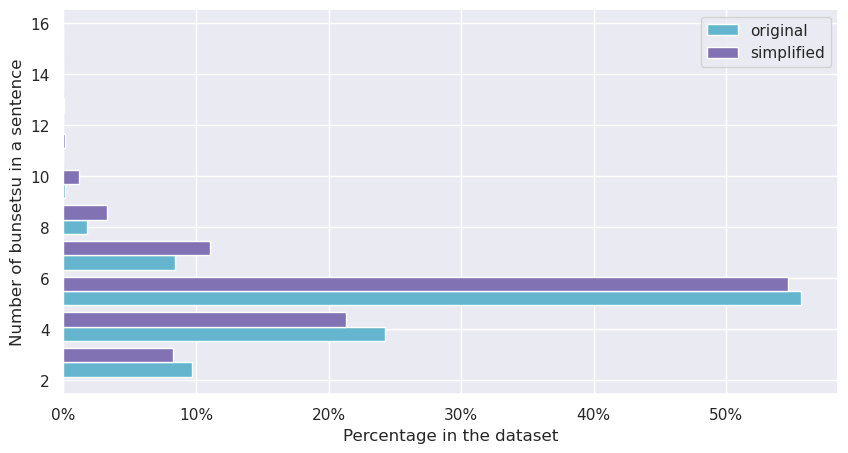

In [7]:
create_histogram(original, simplified, 'bunsetsu', 'Number of bunsetsu in a sentence')

#### Mora

/tmp/ipykernel_2413793/258446453.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


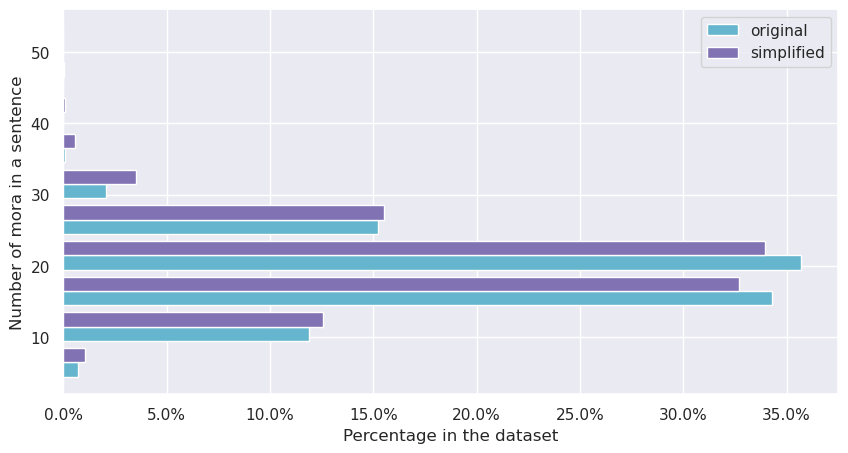

In [8]:
create_histogram(original, simplified, 'moras', 'Number of mora in a sentence')

#### Kanji

/tmp/ipykernel_2413793/258446453.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


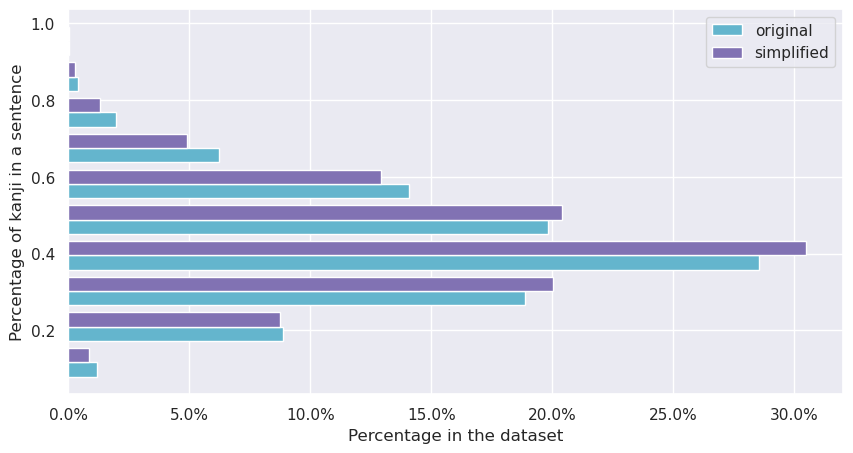

In [9]:
create_histogram(original, simplified, 'kanji_prop', 'Percentage of kanji in a sentence')

#### Honorific Speech (teineigo)

<Figure size 1000x500 with 0 Axes>

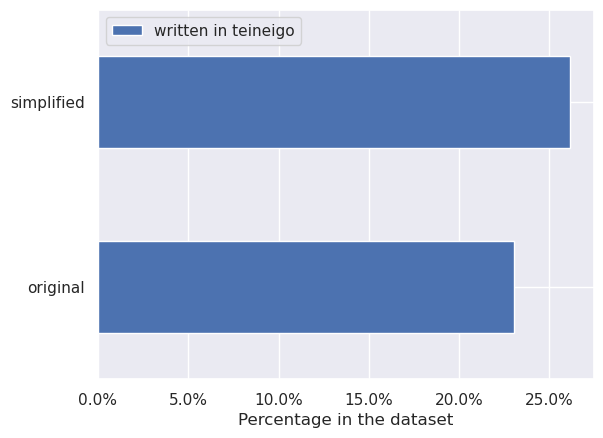

In [10]:
prop_bar('teineigo', ['written in teineigo'])

#### Double Negative

<Figure size 1000x500 with 0 Axes>

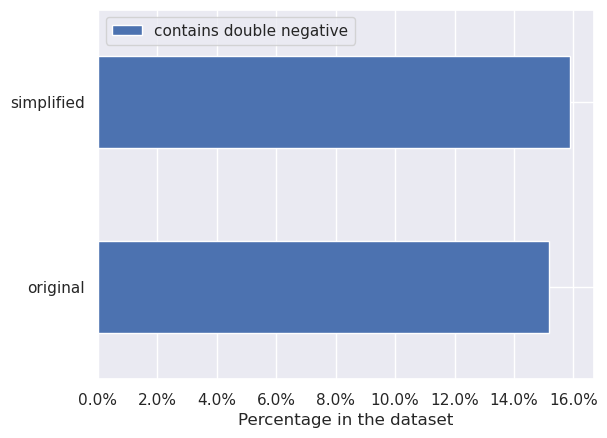

In [11]:
prop_bar('doubleneg', ['contains double negative'])

#### Passive

<Figure size 1000x500 with 0 Axes>

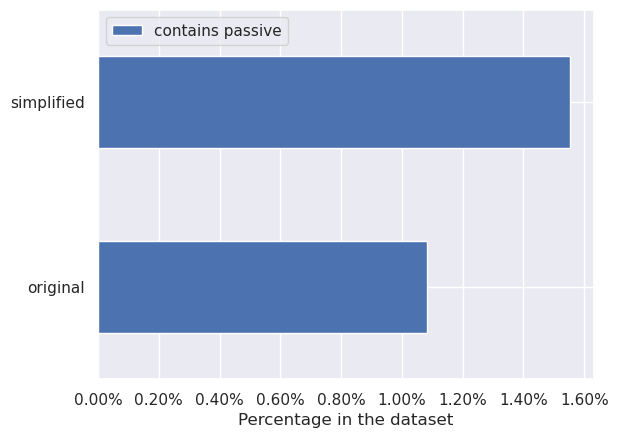

In [12]:
prop_bar('passive', ['contains passive'])